# Image processing notebook: from Beam spectrum to effective wavelenth

### 00 - Introduction


### Applied processing

In [1]:
import sys
sys.path.append(r'..\framework')
sys.path.append(r'..\proc_functions')
sys.path.append(r'..\utilities')
from stack_proc_func import *
from img_utils_4_transmission import *
from plot_cross_sections import *
from eff_wavelength import *
%matplotlib inline

Load time-of-flight information

In [2]:
# %load select_file('spectra_file')
spectra_file = r"E:\PSI21_10NI\RAW_sorted\exp101\001_ref_00\exp101_007_Spectra.txt"

Load beam spectrum

In [3]:
# %load select_file('Beam_profile')
Beam_profile = r"E:\PSI21_10NI\processed\profile.csv"

Basic information for creating the tables. There is no need to change it, except for the flight_path

In [4]:
flight_path = 5.5
beam_windows = 5 #minimum 2
tof_name = 'ToF'
profile_name = 'Profile'

Creating Data Frames from the information in the files

In [5]:
table_tof = dataframe_from_file (spectra_file, [0], sep ='\t', names = [tof_name])
table_profile = dataframe_from_file (Beam_profile, [1], sep = ',', header = None,  names = [profile_name], skiprows = 1)

Give the effective values of the beamline spectrum.
The slices will have a range to which a ToF value is assigned (experimental data)

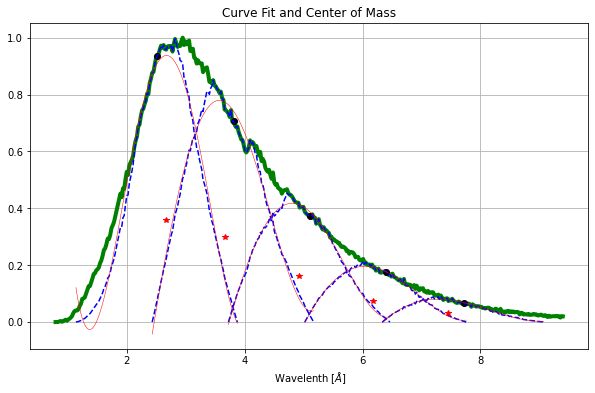

In [6]:
ToF_cord, Y_cord = eff_wvl_beamline( beamline = 'BOA', number_points=5, degree_fit = 4, plot_curve = True, 
                                    base_bot_percentage = 32, base_top_percentage = 8)

Testing: correct values from the beamline spectrum and their conversion to ToF time values

In [7]:
print(ToF_cord)
test = convert_wvl (ToF_cord, flight_path = flight_path)
print(test)

[2.668020338443821, 3.6614597312054635, 4.915247456968198, 6.179462022044463, 7.455763589763598]
[0.003709298712643025, 0.005090458896305254, 0.006833576491807522, 0.008591190326744444, 0.010365608495103002]


Extract the beam (experimental) spectrum from the dataframes created

In [8]:
beam_spectrum = pd.concat([table_tof, table_profile], axis=1)
beam_spectrum = beam_spectrum.to_numpy()

Calculate n number of "middle points" in the experimental sprectum to assign their experimental ToF values to an effective wavelength according to the beamline beam spectrum

In [9]:
tof_points = [0.001891, 0.0034, 0.0053, 0.0069, 0.00842]

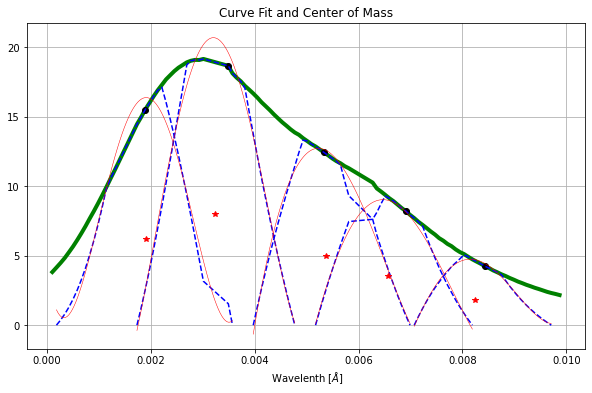

In [10]:
tof_x,_ = eff_wvl_exp(beam_spectrum, tof_points = tof_points, degree_fit = 4, base_bot_percentage = 32, 
                      base_top_percentage = 8, plot_curve = True)

In [11]:
print(tof_x)

[0.0018972439806831164, 0.003225053481200541, 0.005368519828768188, 0.006564049038141822, 0.00824824482264247]


Tis function searches the closes ToF experimental value to the ToF theoretical value

In [12]:
wvl_eff = eff_wvl_exp_values(tof_x, ToF_cord, flight_path = flight_path)
print(wvl_eff)

[2.668020338443821, 2.668020338443821, 3.661459731205463, 4.915247456968198, 6.179462022044462]


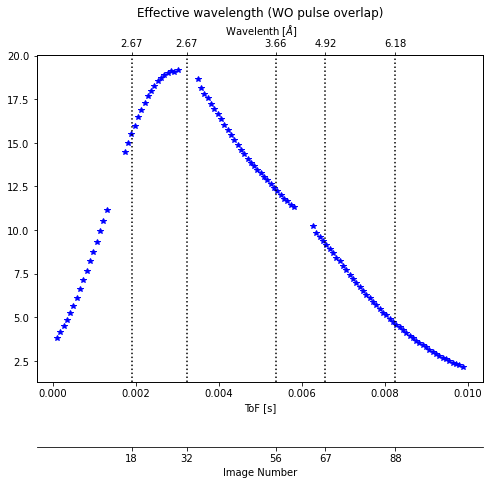

In [13]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_title('Effective wavelength (WO pulse overlap)')
ax1.plot(list(beam_spectrum[:,0]),list(beam_spectrum[:,1]),'b*')
ax1.set_xlabel('ToF [s]')

new_tick_locations = tof_x
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
conv = [round(val,2) for val in wvl_eff]
ax2.set_xticklabels(conv)
ax2.set_xlabel(' Wavelenth '+ r'[$\AA$]')

ax3 = ax1.twiny()
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
ax3.spines["bottom"].set_position(("axes", -0.20))

ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(tof_x)
ticks = [(table_tof[tof_name].sub(i).abs().idxmin(axis=1)) for i in tof_x]
ax3.set_xticklabels(ticks)
ax3.set_xlabel('Image Number')

for x in tof_x:
    plt.axvline(x=x, color='k', linestyle=':')